# PBH event rates

Plot the event rate of neutrinos for different neutrino detectors

In [1]:
from Source.event_rate import *

def plot_events(Mpbhs, fpbhs, exp, as_DM):

    compute_events(Mpbhs, fpbhs, exp, as_DM, plotevents=1)

    plt.ylim(1.e-3, 2.e2)
    plt.yscale("log")
    plt.legend(loc="lower right")
    plt.xlabel('$E{\\rm \,\, [MeV]}$')
    plt.ylabel('${\\rm d}N/d E \,\, [{\\rm MeV}^{-1}{\\rm yr}^{-1}]$')
    plt.title(exp)
    plt.tick_params(axis='both', which='both', top=True, right=True, direction="in")
    plt.grid(which="major",linestyle=":",linewidth=1)
    plt.savefig("figures/events_"+exp+".png", bbox_inches='tight', dpi=300)
    plt.show()
    plt.gcf().clear()


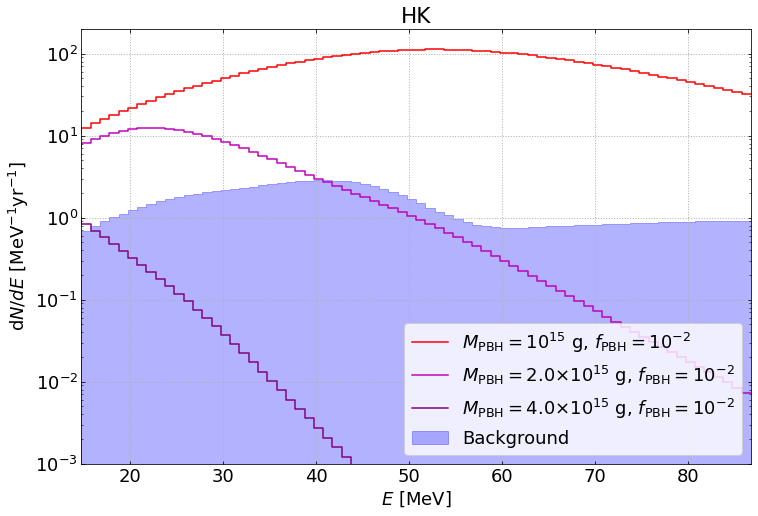

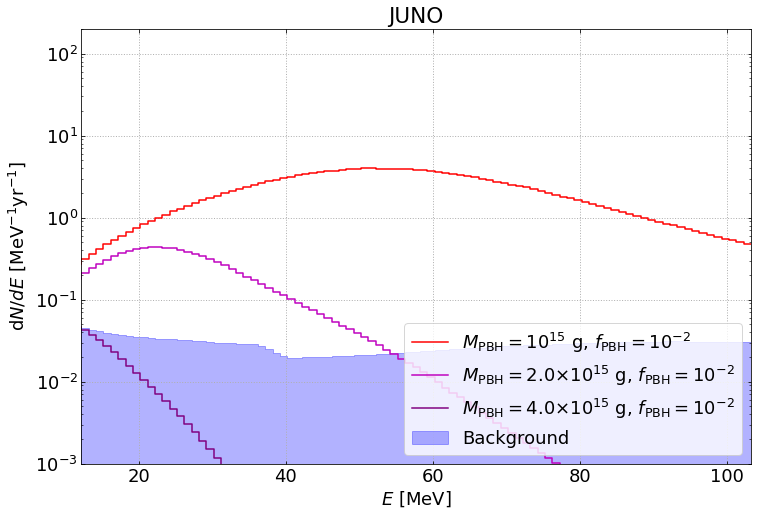

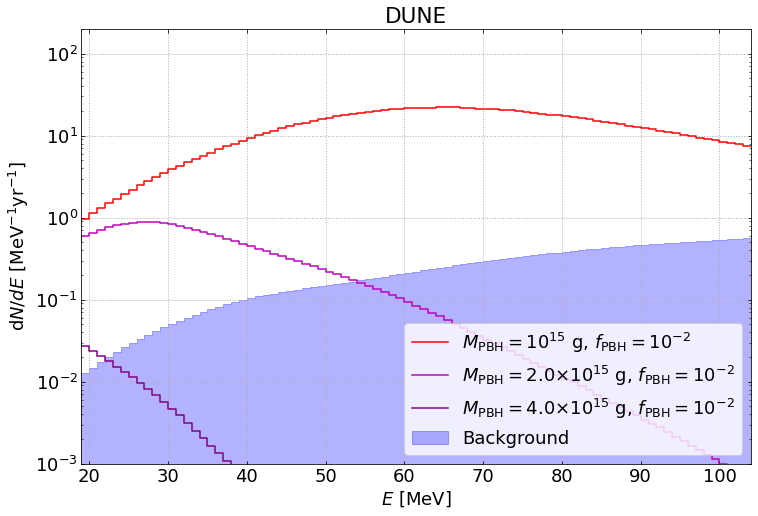

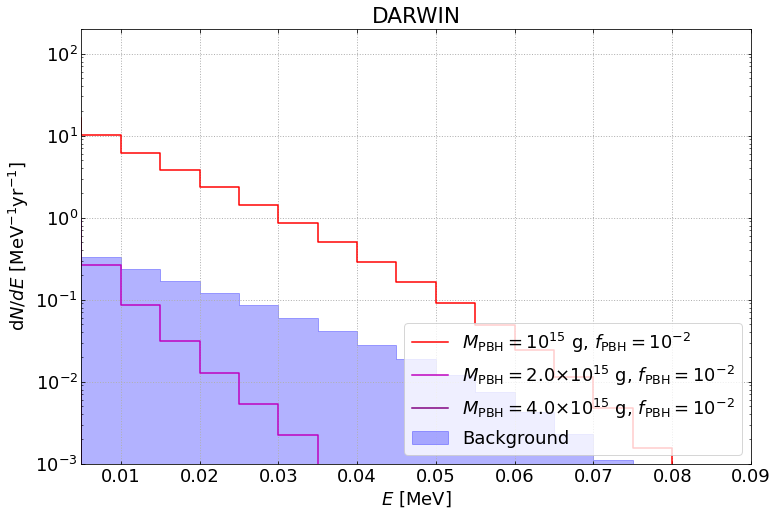

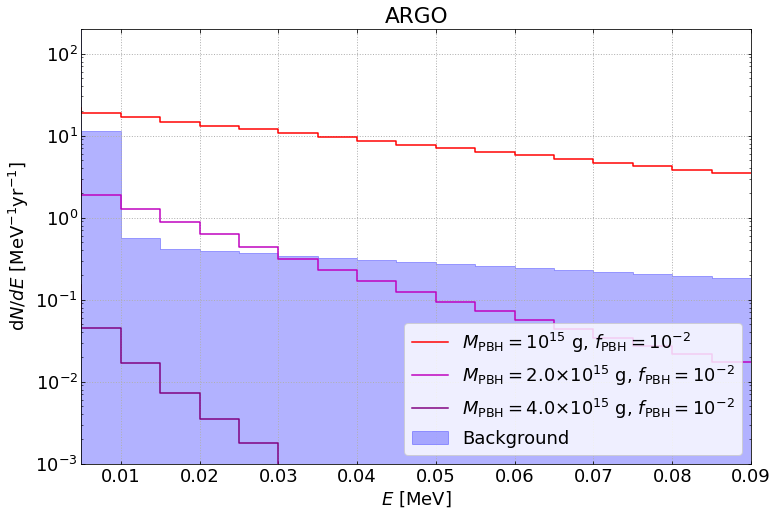

<Figure size 864x576 with 0 Axes>

In [2]:
Mpbhs =  [1e15, 2e15, 4e15]
fpbhs = 1.e-2*np.ones_like(Mpbhs)

list_exps = ["HK", "JUNO", "DUNE", "DARWIN", "ARGO"]

for exp in list_exps:
    plot_events(Mpbhs, fpbhs, exp, 1)

# Include energy resolution so the event rate is proportional to:

# $ \int dE_{r} G(E_{r},E_{r}^{o})\int dE_{\nu} \frac{d\sigma}{dE_{r}} \frac{d\phi}{dE_{\nu}} \theta(E_{r}^{max}-E_{r})$

(1e-30, 100000.0)

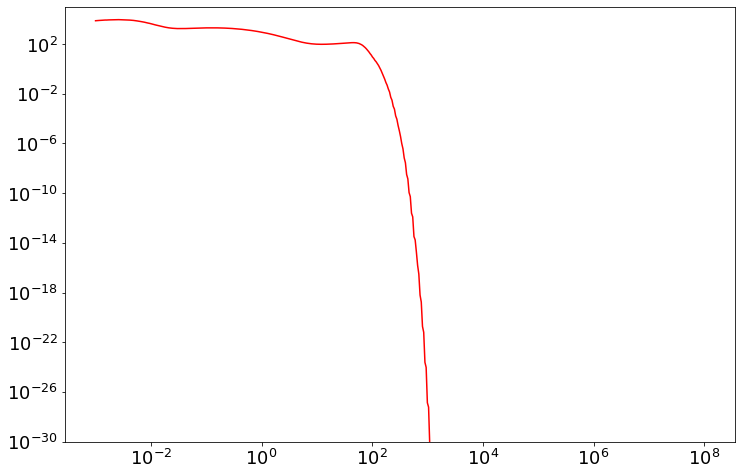

In [3]:
#--- LOAD THE FLUX:
from Source.flux_stuff import *
Mpbhs=[1e15]
is_DM=1
fpbh=1
for mm, Mpbh in enumerate(Mpbhs):

    fileflux = "fluxes/{:.1e}/flux_isDM_{}_mc.txt".format(Mpbh, is_DM)
    E_nu, flux = np.loadtxt(fileflux, unpack=True)
    plt.loglog( E_nu, fpbh*flux, color = cols[mm], linestyle="-" )
    
#from scipy.interpolate import interp1d    
#fluxint=interpolate.interp1d(E_nu, flux,bounds_error=False,fill_value="extrapolate")    

#--- this is how I'm interpolating
fluxint=interp1d(E_nu, flux,bounds_error=False,fill_value="extrapolate")    

plt.ylim([1e-30,1e5])

In [4]:
#--- COMPUTE EVENTS FOR ARGO:

#--- ingredients from event_rate.py
Z = 54.
A = 132
mfrac = 1. # take the most abundant
m_uma = 131.293
m_fid = 40.e6 #40.e6   # g
ntot = m_fid*(gr_to_GeV*1.e3)/(m_uma*m_p)
mT = m_p*Z + m_n*(A-Z)
#-------------------------------------------------

# E_nu and Enuvec are vectors

Er_tst=0.005
Enuvec = np.logspace( np.log10(E_nu_min_CE(Er_tst, mT)), np.log10(E_nu[-1]), 500 )
print(len(E_nu),len(Enuvec))

# E_o: observed energy (of positron, gamma, etc)
#E_o=50
#print('E_nu: ',E_nu)

#Enuvec       
#print('Enuvec: ',Enuvec)
#-------------------------------------------------

#---- define recoil vector
#E_r = np.linspace(0.005,E_o*10,500) # check the spacing of this vector
E_r = np.logspace(np.log10(5e-3),np.log10(0.1),500)


500 500


In [5]:
#--- step 1: integrate in Enu

eps=1.
int_enu=[]

for er in E_r:
    Enuvec = np.logspace( np.log10(E_nu_min_CE(er, mT)), np.log10(E_nu[-1]), 500 )
    #print(Enuvec)
    #print(np.shape(Enuvec))
    I=ntot*eps*integrate.simps( sigma_diff_CEnuNS(Enuvec, er, A, Z, mT)*fluxint(Enuvec)*np.heaviside(E_r_max(Enuvec, mT)-er, 0.), Enuvec)
    int_enu.append(I)
    
#int_enu    

In [6]:
Integrate_inEr=interp1d(E_r, int_enu, fill_value="extrapolate")

In [7]:
#---- define resolution and visible energy
res=0.12
E_o=np.logspace(np.log10(E_r[10]),np.log10(E_r[490]),500)
min(E_o), max(E_o)

#gauss_prof(res,E_r, E_o)

#--- compute the rate
rate_Eo=integrate.simps(Integrate_inEr(E_r)*gauss_prof(res,E_r,min(E_o)), E_r)
rate_Eo

9.241753484921659e-05

In [8]:
#--- step 2: integrate in Er:

def IntegrandoEr(Er,Eo):
    return Integrate_inEr(Er)*gauss_prof(res,Er,Eo)
#IntegrandoEr(0.01,0.01),IntegrandoEr(0.04,0.01)

rate_Eo=[]
for eo in E_o:
    I=integrate.quad(IntegrandoEr,min(E_r),max(E_r),args=eo)
    rate_Eo.append(I[0])
    
rate_Eo    

[9.241780543041658e-05,
 9.249708058459186e-05,
 9.257672723812483e-05,
 9.265674759520601e-05,
 9.273714387594381e-05,
 9.28179183164917e-05,
 9.28990731691768e-05,
 9.298061070262907e-05,
 9.306253320191177e-05,
 9.314484296865233e-05,
 9.322754232117485e-05,
 9.3310633594633e-05,
 9.339411914114439e-05,
 9.34780013299252e-05,
 9.35622825474267e-05,
 9.364696519747174e-05,
 9.37320517013932e-05,
 9.381754449817241e-05,
 9.390344604457924e-05,
 9.398975881531303e-05,
 9.407648530314415e-05,
 9.416362801905698e-05,
 9.42511894923933e-05,
 9.43391722709974e-05,
 9.442757892136127e-05,
 9.451641202877136e-05,
 9.460567419745618e-05,
 9.469536805073457e-05,
 9.478549623116518e-05,
 9.487606140069694e-05,
 9.496706624082007e-05,
 9.505851345271849e-05,
 9.515040575742291e-05,
 9.52427458959648e-05,
 9.533553662953128e-05,
 9.542878073962114e-05,
 9.552248102820154e-05,
 9.561664031786544e-05,
 9.571126145199038e-05,
 9.58063472948976e-05,
 9.590190073201254e-05,
 9.599792467002548e-05,
 9.

[]

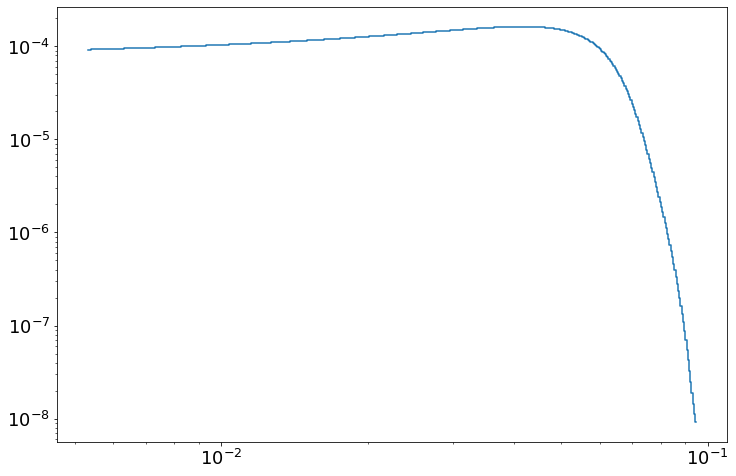

In [9]:
#--- plot event rate
plt.step(E_o,rate_Eo)
plt.loglog()